In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
def plt_display(image, title):
    fig = plt.figure()
    a = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(image)
    a.set_title(title)

In [3]:
imagePath = imagePath="/home/ubuntu/dataset/DATASET/train/Cow00/Cow00_0_51.jpg"
image_string = tf.io.read_file(imagePath)

[[[112. 105.  89.]
  [115. 108.  92.]
  [117. 110.  94.]
  ...
  [  7.   8.   3.]
  [ 12.   8.   5.]
  [ 13.   9.   6.]]

 [[115. 108.  92.]
  [117. 110.  94.]
  [118. 111.  95.]
  ...
  [  8.   7.   3.]
  [ 12.   8.   5.]
  [ 13.   9.   6.]]

 [[116. 109.  93.]
  [118. 111.  95.]
  [119. 112.  96.]
  ...
  [  8.   7.   3.]
  [ 12.   8.   5.]
  [ 13.   9.   6.]]

 ...

 [[141. 133.  97.]
  [145. 137. 101.]
  [143. 135.  99.]
  ...
  [106. 111.  70.]
  [112. 117.  76.]
  [117. 122.  81.]]

 [[142. 134.  98.]
  [147. 139. 103.]
  [144. 136. 100.]
  ...
  [116. 121.  80.]
  [127. 132.  91.]
  [122. 127.  86.]]

 [[152. 144. 108.]
  [157. 149. 113.]
  [152. 144. 108.]
  ...
  [116. 123.  81.]
  [127. 134.  92.]
  [122. 129.  87.]]]
tf.Tensor(
[[[112. 105.  89.]
  [115. 108.  92.]
  [117. 110.  94.]
  ...
  [  7.   8.   3.]
  [ 12.   8.   5.]
  [ 13.   9.   6.]]

 [[115. 108.  92.]
  [117. 110.  94.]
  [118. 111.  95.]
  ...
  [  8.   7.   3.]
  [ 12.   8.   5.]
  [ 13.   9.   6.]]

 [[116.

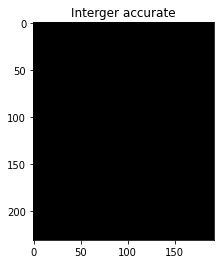

In [4]:
cvImg = cv2.imread(imagePath).astype(np.float32)[:,:,::-1]
tfImg = tf.image.decode_jpeg(image_string, channels=3, dct_method='INTEGER_ACCURATE')
tfImg = tf.cast(tfImg,dtype=tf.float32)
print(cvImg)
print(tfImg)
plt_display(np.abs(cvImg-tfImg.numpy()), "Interger accurate")

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


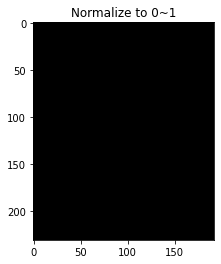

In [5]:
cvImg = cvImg/255.
tfImg = tfImg/255.
# tfImg = tf.image.convert_image_dtype(tfImg, tf.float32)
print(np.abs(cvImg-tfImg.numpy()))
plt_display(np.abs(cvImg-tfImg.numpy()), "Normalize to 0~1")

[[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [8.5681677e-08 0.0000000e+00 3.4458935e-08]
  [3.3527613e-08 3.3527613e-08 3.3527613e-08]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [6.7055225e-08 1.8626451e-08 3.4458935e-08]
  [3.3527613e-08 3.3527613e-08 3.3527613e-08]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [6.7055225e-08 1.8626451e-08 3.4458935e-08]
  [3.3527613e-08 3.3527613e-08 3.3527613e-08]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

 ...

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ..

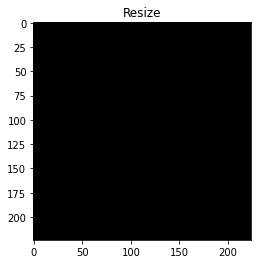

In [6]:
cvImg = cv2.resize(cvImg, (224, 224))
tfImg = tf.image.resize(tfImg, [224, 224])
print(np.abs(cvImg-tfImg.numpy()))
plt_display(np.abs(cvImg-tfImg.numpy()), "Resize")